In [99]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Impor the Alphavantage API key
from config import api_key



from datetime import datetime

In [100]:
# List of stock tickers you want to loop through
tickers = ["HYDR", "TAN", "FAN"]

# Alpha Vantage API base URL and time function
url = "https://www.alphavantage.co/query"
time_function = "TIME_SERIES_MONTHLY"

# Dictionary to store the closing prices for each ticker
stock_data = {}

# Loop through each ticker in the list
for ticker in tickers:
    
    # Make URL for each ticker
    api_url = f"{url}?function={time_function}&symbol={ticker}&apikey={api_key}"
    
    # Get data from Alpha Vantage API
    response = requests.get(api_url).json()
    
    # Open Monthly Time Series Dictionary 
    monthly_data = response['Monthly Time Series']
    
    # Initialize an empty dictionary to store close prices for the ticker
    close_prices = {}
    
    # Loop through the monthly_data dictionary explicitly
    for date, data in monthly_data.items():
        # Extract the close price for each date
        close_price = data['4. close']
        # Add the date and close price to the close_prices dictionary
        close_prices[date] = close_price
    
    # GBT: Convert the close_prices dictionary to a DataFrame and set 'Date' as the index
    df = pd.DataFrame(list(close_prices.items()), columns=['Date', f'{ticker} Close Price'])
    df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime
    df.set_index('Date', inplace=True)  # Set 'Date' as index
    
    # Store the DataFrame in the stock_data dictionary
    stock_data[ticker] = df
    
    # Pause to avoid API rate limits
    time.sleep(1)  

# GBT: Combine all DataFrames on the 'Date' index
combined_df = pd.concat(stock_data.values(), axis=1)

# Display the final combined DataFrame
combined_df.head(20)


,HYDR Close Price,TAN Close Price,FAN Close Price
Date,,,
2008-05-30,NaN,27.8000,NaN
2008-06-30,NaN,25.8000,NaN
2008-07-31,NaN,23.6000,27.6700
2008-08-29,NaN,26.2800,26.0000
2008-09-30,NaN,17.9400,19.2800
2008-10-31,NaN,10.4000,12.1560
2008-11-28,NaN,8.0500,11.9176
2008-12-31,NaN,8.7700,12.5200
2009-01-30,NaN,7.2500,11.2800


In [101]:
cutoff_date = pd.to_datetime('2014-01-01')
cutoff_date2 = pd.to_datetime('2024-02-01')
filtered_df = combined_df[(combined_df.index > cutoff_date) & (combined_df.index < cutoff_date2)]
filtered_df

,HYDR Close Price,TAN Close Price,FAN Close Price
Date,,,
2014-01-31,NaN,39.3300,11.3800
2014-02-28,NaN,46.7000,12.1700
2014-03-31,NaN,44.2100,12.0500
2014-04-30,NaN,40.8800,12.2200
2014-05-30,NaN,40.7900,13.1200
...,...,...,...
2023-09-29,7.3900,51.7900,14.4900
2023-10-31,6.0600,41.9800,13.5900
2023-11-30,6.5300,45.8400,15.0856


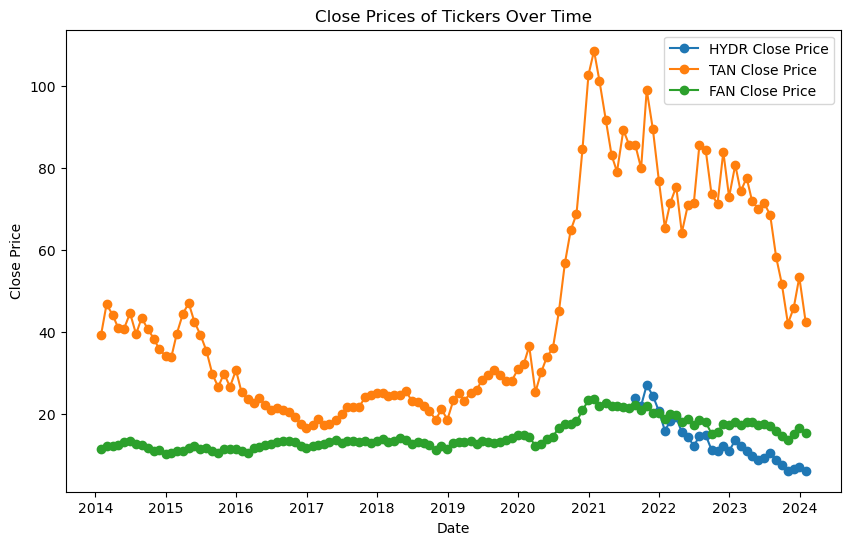

In [108]:


# Ensure Close Price columns are numeric
for ticker in tickers:
    filtered_df[f'{ticker} Close Price'] = pd.to_numeric(filtered_df[f'{ticker} Close Price'], errors='coerce')

# Create a line chart for each of the tickers
plt.figure(figsize=(10, 6))

# Plot each ticker's close price column, dropping NaN values before plotting
for ticker in tickers:
    filtered_data = filtered_df[f'{ticker} Close Price'].dropna()
    
    # Plot the data with a cleaner line style
    plt.plot(filtered_data.index, filtered_data, label=f'{ticker} Close Price', linestyle='-', marker='o')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Prices of Tickers Over Time')

# Show the legend
plt.legend()

# Display the plot
plt.show()


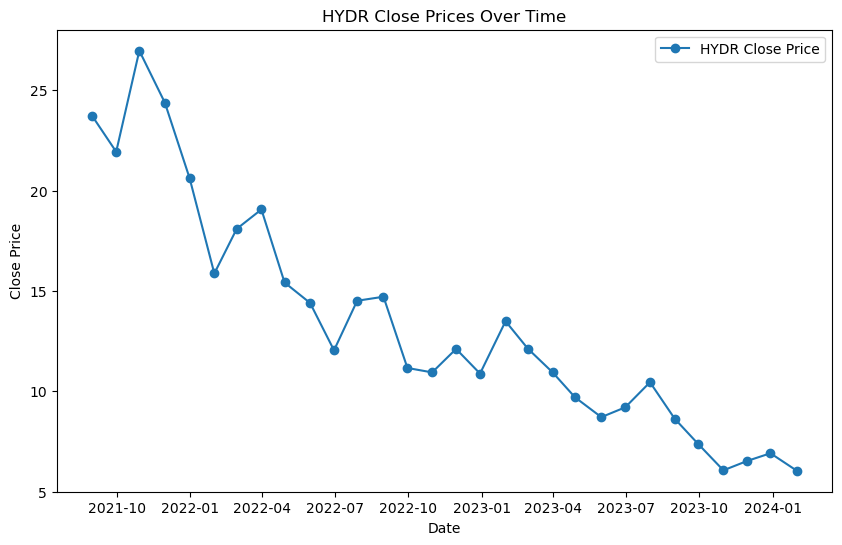

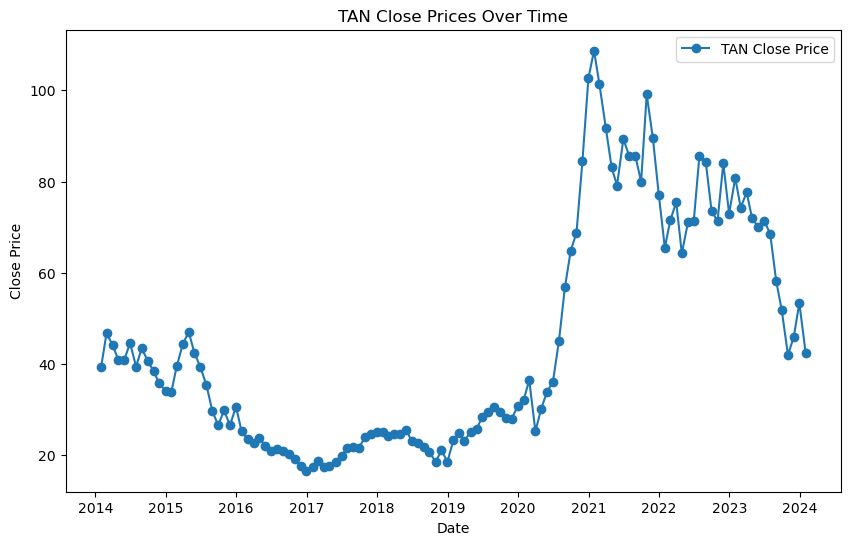

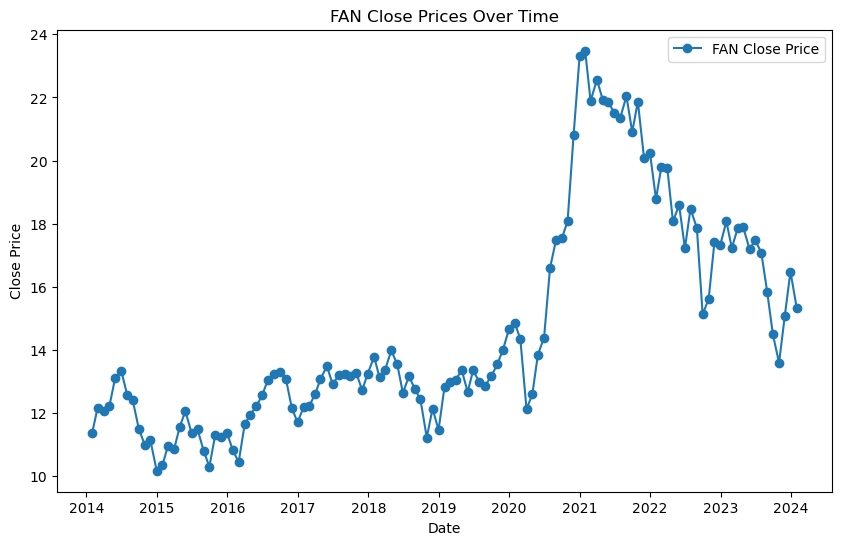

In [109]:

# Ensure that the Close Price columns are numeric
for ticker in tickers:
    filtered_df[f'{ticker} Close Price'] = pd.to_numeric(filtered_df[f'{ticker} Close Price'], errors='coerce')

# Block 1: Plot for HYDR
plt.figure(figsize=(10, 6))
filtered_data = filtered_df['HYDR Close Price'].dropna()
plt.plot(filtered_data.index, filtered_data, label='HYDR Close Price', linestyle='-', marker='o')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('HYDR Close Prices Over Time')
plt.legend()
plt.show()

# Block 2: Plot for TAN
plt.figure(figsize=(10, 6))
filtered_data = filtered_df['TAN Close Price'].dropna()
plt.plot(filtered_data.index, filtered_data, label='TAN Close Price', linestyle='-', marker='o')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('TAN Close Prices Over Time')
plt.legend()
plt.show()

# Block 3: Plot for FAN
plt.figure(figsize=(10, 6))
filtered_data = filtered_df['FAN Close Price'].dropna()
plt.plot(filtered_data.index, filtered_data, label='FAN Close Price', linestyle='-', marker='o')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('FAN Close Prices Over Time')
plt.legend()
plt.show()

In [110]:
# Estimated Data Compiled From External Source and Manually Entered into List
# Each value represents the global renewable energy capacity (TWh) starting on 2014-01-31 going to 2024-01-31 
# With 1 value per month
renewable_energy_capacity = [
    5100, 5133, 5167, 5200, 5233, 5267, 5300, 5333, 5367, 5400, 5433, 5467,
    5500, 5546, 5592, 5638, 5683, 5729, 5775, 5821, 5867, 5912, 5958, 6004,
    6050, 6079, 6108, 6138, 6167, 6196, 6225, 6254, 6283, 6312, 6342, 6371,
    6400, 6429, 6458, 6488, 6517, 6546, 6575, 6604, 6633, 6662, 6692, 6721,
    6750, 6788, 6825, 6862, 6900, 6938, 6975, 7012, 7050, 7088, 7125, 7162,
    7200, 7229, 7258, 7288, 7317, 7346, 7375, 7404, 7433, 7462, 7492, 7521,
    7550, 7579, 7608, 7638, 7667, 7696, 7725, 7754, 7783, 7812, 7842, 7871,
    7900, 7938, 7975, 8012, 8050, 8088, 8125, 8162, 8200, 8238, 8275, 8312,
    8350, 8393, 8436, 8478, 8521, 8564, 8607, 8650, 8693, 8736, 8778, 8821,
    8864, 8909, 8953, 8998, 9043, 9087, 9132, 9177, 9221, 9266, 9311, 9355, 9400
]


In [111]:
filtered_df['Renewable Energy Capacity (TWh)'] = renewable_energy_capacity
filtered_df

,HYDR Close Price,TAN Close Price,FAN Close Price,Renewable Energy Capacity (TWh)
Date,,,,
2014-01-31,NaN,39.33,11.3800,5100
2014-02-28,NaN,46.70,12.1700,5133
2014-03-31,NaN,44.21,12.0500,5167
2014-04-30,NaN,40.88,12.2200,5200
2014-05-30,NaN,40.79,13.1200,5233
...,...,...,...,...
2023-09-29,7.39,51.79,14.4900,9221
2023-10-31,6.06,41.98,13.5900,9266
2023-11-30,6.53,45.84,15.0856,9311


Slope: 0.012617559884052275
Intercept: -46.008897977845784
R-squared: 0.3705163006197186
P-value: 1.2957666900836958e-13
Standard error: 0.0015076150996588308


/var/folders/fr/k0g1psmj1kg7d4hq5ww_6drw0000gn/T/ipykernel_47394/2251513092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['TAN Close Price'] = pd.to_numeric(filtered_df['TAN Close Price'], errors='coerce')


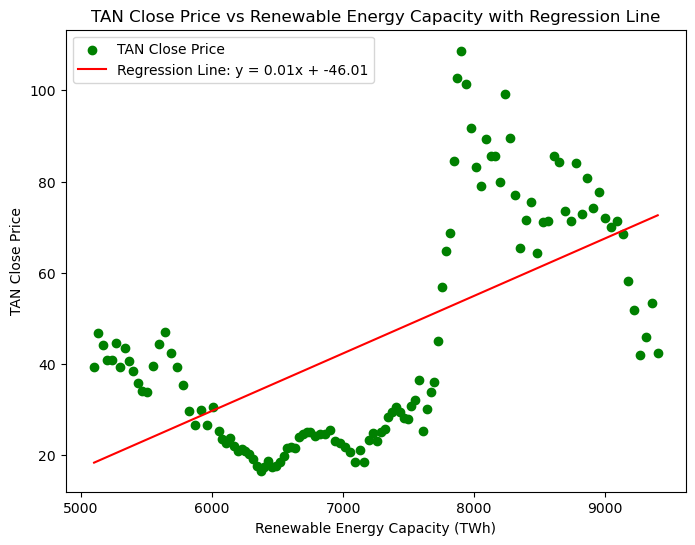

In [106]:


# Ensure 'TAN Close Price' is numeric by coercing errors to NaN
filtered_df['TAN Close Price'] = pd.to_numeric(filtered_df['TAN Close Price'], errors='coerce')

# Drop any rows with NaN values to avoid issues during regression
filtered_df = filtered_df.dropna(subset=['Renewable Energy Capacity (TWh)', 'TAN Close Price'])

# Perform linear regression
x = filtered_df['Renewable Energy Capacity (TWh)']
y = filtered_df['TAN Close Price']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print regression results to verify
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

# Equation of the regression line in the format: y = mx + b
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='green', label='TAN Close Price')

# Define a range for x values to plot the regression line
x_range = np.linspace(x.min(), x.max(), 100)
plt.plot(x_range, slope * x_range + intercept, color='red', label=f'Regression Line: {equation}')

# Add labels and title
plt.xlabel('Renewable Energy Capacity (TWh)')
plt.ylabel('TAN Close Price')
plt.title('TAN Close Price vs Renewable Energy Capacity with Regression Line')
plt.legend()

# Display the plot
plt.show()


Slope: 0.002024988108975098
Intercept: 0.12050978111304111
R-squared: 0.5051029871333192
P-value: 6.788085972566732e-20
Standard error: 0.00018374538685189136


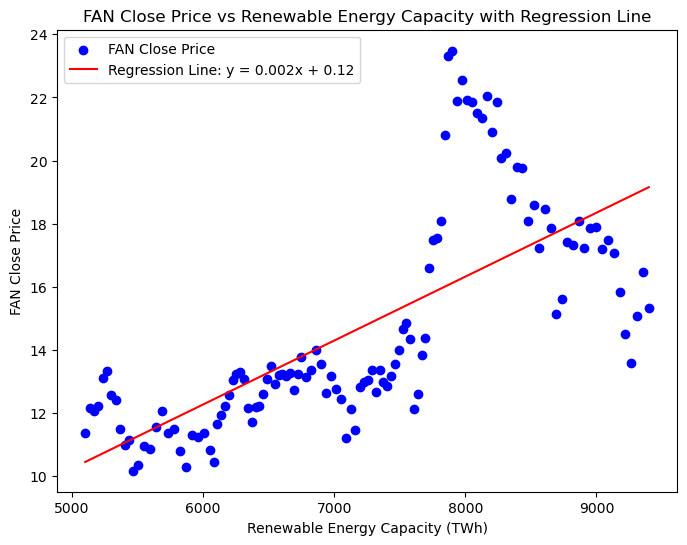

In [107]:
# Ensure 'FAN Close Price' is numeric by coercing errors to NaN
filtered_df['FAN Close Price'] = pd.to_numeric(filtered_df['FAN Close Price'], errors='coerce')


# Perform linear regression
x = filtered_df['Renewable Energy Capacity (TWh)']
y = filtered_df['FAN Close Price']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

# Equation of the regression line in the format: y = mx + b
equation = f'y = {slope:.3f}x + {intercept:.2f}'

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='FAN Close Price')

# Plot the regression line with the equation as the label
plt.plot(x, slope*x + intercept, color='red', label=f'Regression Line: {equation}')

# Add labels and title
plt.xlabel('Renewable Energy Capacity (TWh)')
plt.ylabel('FAN Close Price')
plt.title('FAN Close Price vs Renewable Energy Capacity with Regression Line')
plt.legend()

# Display the plot
plt.show()

Slope: -0.013950660544108451
Intercept: 135.7009058954145
R-squared: 0.8529817631864332
P-value: 3.546079986072951e-13
Standard error: 0.0010945396222818613


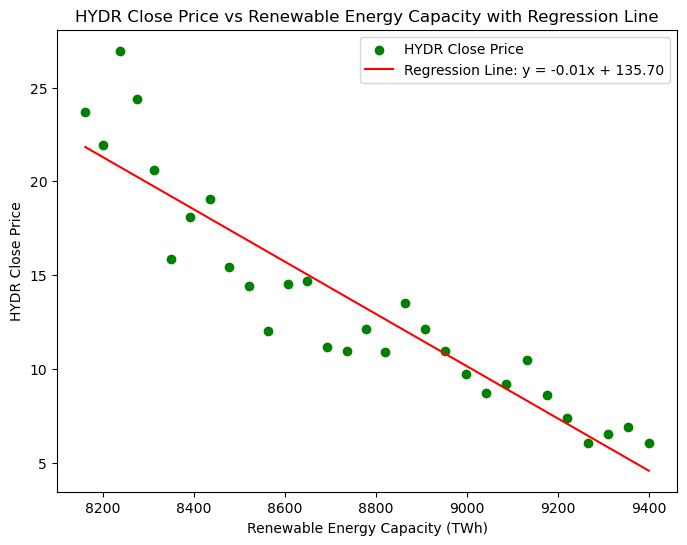

In [98]:
# Ensure 'HYDR Close Price' is numeric by coercing errors to NaN
filtered_df['HYDR Close Price'] = pd.to_numeric(filtered_df['HYDR Close Price'], errors='coerce')

# Drop rows with NaN values in 'Renewable Energy Capacity (TWh)' or 'HYDR Close Price'
filtered_df2 = filtered_df.dropna(subset=['Renewable Energy Capacity (TWh)', 'HYDR Close Price'])

# Perform linear regression
x = filtered_df2['Renewable Energy Capacity (TWh)']
y = filtered_df2['HYDR Close Price']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

# Equation of the regression line in the format: y = mx + b
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='green', label='HYDR Close Price')

# Plot the regression line with the equation as the label
plt.plot(x, slope*x + intercept, color='red', label=f'Regression Line: {equation}')

# Add labels and title
plt.xlabel('Renewable Energy Capacity (TWh)')
plt.ylabel('HYDR Close Price')
plt.title('HYDR Close Price vs Renewable Energy Capacity with Regression Line')
plt.legend()

# Display the plot
plt.show()